# COGS 108 - Final Project 

# Overview

My project aims to analyze the median household incomes for cities in San Diego and the average ratings for parks in those cities. Specifically, I want to see if there is a direct correlation between the two, with lower income resulting in lower ratings and higher income resulting in higher ratings. Lower income communities are already being disproportionately affected by many factors, so my goal is to see if the park ratings are reflective of this. Ultimately, the data found was not able to conclude that there is a relationship between median household income and park ratings. 

# Name & GitHub ID

- Name: Bryan Lee
- GitHub Username: baquerst

# Research Question

*Within San Diego county, is there a correlation between the median household income by city and the rating of reviews for parks in those cities?*

## Background and Prior Work

Parks and recreation services are meant to serve communities by providing them with an outlet for physical activites, group activites, and places for congregation. However, it has been shown that there can be disparities in park distribution and access among neighborhoods based on income or race/ethnicity<sup>1</sup>. The study done by the National Recreation and Park Association (NPRA) investigates this disparity throughout multiple cities in America, but has not conducted a study in San Diego. 

Jim Sallis, the director of Active Living Research at SDSU has stated how “many low-income communities lack access to parks, recreation areas and sources of healthy foods[...] and those factors play a significant role in preventing participation in outdoor activity in their communities<sup>2</sup>” This decrease in resources could also lead to parks established in those areas to be unkept or unserviced, leading to lower reviews.

My study aims to research the number of parks and recreational programs that are available to differing neighborhoods in San Diego, and to find a discrepancy between low-income neighborhoods and non-low-income neighborhoods.

References:
1. [Parks and Recreation in Underserved Areas: A Public Health Perspective](https://www.nrpa.org/uploadedFiles/nrpa.org/Publications_and_Research/Research/Papers/Parks-Rec-Underserved-Areas.pdf)
2. [Poor Neighborhoods Can Harm Health](http://newscenter.sdsu.edu/sdsu_newscenter/news_story.aspx?sid=73238)

# Hypothesis


*I hypothesize that lower income cities will have more negative park reviews. Lower income would mean less funding for parks and recreation, causing this disparity.*

# Dataset(s)



- Dataset Name: 2016 San Diego County Demographic Profiles - Median Income and Persons Per Household, by City
- Link to the dataset: https://data.sandiegocounty.gov/Demographics/2016-San-Diego-County-Demographic-Profiles-Median-/mh9x-cdz6
- Number of observations: 18
- Description: This dataset includes the median household income for each city within San Diego County. It also contains the average person per household and the median household income divided by the persons per household


- Dataset Name: San Diego Parks Yelp Reviews
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_parks.csv
- Number of observations: 833
- Description: This dataset contains the average rating for each park in San Diego county, the number of ratings, and other identifiable information such as address, phone number, the link to its Yelp page, and whether it's closed or not.

For these datasets I will be using the Median Household Income from the 2016 San Diego County and the average rating for Yelp park reviews for each city in San Diego county. I will be joining them to compare the two and to test whether they have a relationship or not.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, norm, ttest_ind

import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

import patsy
import statsmodels.api as sm

%config InlineBackend.figure_format = 'retina'

# Data Cleaning

The first dataset I will load in is the Yelp reviews for parks within San Diego county.

In [2]:
#Loading in the Yelp Review data
df_yelp = pd.read_csv('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_parks.csv')
df_yelp

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False
...,...,...,...,...,...,...,...,...,...,...
828,Del Cerro - San Diego,"San Diego, CA 92120",1.619287e+10,ggbc59hSsl6pxCGSN1QLQA,https://www.yelp.com/biz/del-cerro-san-diego-s...,4.5,12,-117.073524,32.792626,False
829,San Diego Metropolitan Transit System,"1255 Imperial Ave Ste 1000 San Diego, CA 92101",1.619238e+10,c8jhIMcwSjWqBD7S-faKYg,https://www.yelp.com/biz/san-diego-metropolita...,2.5,268,-117.153400,32.705760,False
830,Petco Park,"100 Park Blvd San Diego, CA 92101",1.619796e+10,HkgSbRLVMRHExsRkImIK5A,https://www.yelp.com/biz/petco-park-san-diego?...,4.0,1667,-117.157054,32.707246,False
831,Ann D. L'Heureux Memorial Dog Park,"2700 Carlsbad Village Dr Carlsbad, CA 92008",1.760434e+10,wYGJ65iVMi74-3TylWxY0Q,https://www.yelp.com/biz/ann-d-l-heureux-memor...,3.0,50,-117.316419,33.171137,False


The only relevant data needed for the dataframe is the name of the park, its address, rating, and its review count. I will be dropping all other columns with data that is not neccessary.

In [3]:
df_yelp = df_yelp[['name', 'address', 'rating', 'review_count']].copy()
df_yelp.head()

,name,address,rating,review_count
0,Balboa Park,"1549 El Prado San Diego, CA 92101",5.0,2105
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",4.5,46
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",4.5,242
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",4.5,102
4,Bay View Park,"413 1st St Coronado, CA 92118",5.0,42


To ensure the ratings for each park are reflective of its quality, I will be removing observations that have less than 50 reviews. I believe that having less than 50 reviews is too small of a dataset to be considered.

In [4]:
df_yelp = df_yelp[df_yelp['review_count'] > 50]

To make the distinction clear which park belongs to which city within San Diego county, and also for analysis later on, I will be transforming the address of each park to only its city name.

In [5]:
def separateByCity(string):
    if 'Carlsbad' in string:
        output = 'Carlsbad'
    elif 'Chula Vista' in string:
        output = 'Chula Vista'
    elif 'Coronado' in string:
        output = 'Coronado'
    elif 'Del Mar' in string:
        output = 'Del Mar'
    elif 'El Cajon' in string:
        output = 'El Cajon'
    elif 'Encinitas' in string:
        output = 'Encinitas'
    elif 'Escondido' in string:
        output = 'Escondido'
    elif 'Imperial Beach' in string:
        output = 'Imperial Beach'
    elif 'La Mesa' in string:
        output = 'La Mesa'
    elif 'Lemon Grove' in string:
        output = 'Lemon Grove'
    elif 'National City' in string:
        output = 'National City'
    elif 'Oceanside' in string:
        output = 'Oceanside'
    elif 'Poway' in string:
        output = 'Poway'
    #I found out that La Jolla is considered part of San Diego city so I will include it
    elif 'La Jolla' in string:
        output = 'San Diego'    
    elif 'San Diego' in string:
        output = 'San Diego'
    elif 'San Marcos' in string:
        output = 'San Marcos'
    elif 'Santee' in string:
        output = 'Santee'
    elif 'Solana Beach' in string:
        output = 'Solana Beach'
    elif 'Vista' in string:
        output = 'Vista'
    else:
        output = np.nan
        
    return output

In [6]:
df_yelp['address'] = df_yelp['address'].apply(separateByCity)
df_yelp

,name,address,rating,review_count
0,Balboa Park,San Diego,5.0,2105
2,Waterfront Park,San Diego,4.5,242
3,Trolley Barn Park,San Diego,4.5,102
6,Presidio Park,San Diego,4.5,85
7,Kate O Sessions Memorial Park,San Diego,4.5,276
...,...,...,...,...
818,The Cottage La Jolla,San Diego,4.0,4211
819,Brockton Villa Restaurant,San Diego,4.0,1749
822,Capehart Dog Park,San Diego,3.0,85
829,San Diego Metropolitan Transit System,San Diego,2.5,268


Now I will just be renaming the columns for better clarity. I will also drop any rows with NaN values since each component is needed.

In [7]:
df_yelp.columns = ['ParkName', 'City', 'ParkRating', 'ReviewCount']
df_yelp = df_yelp.dropna()
df_yelp

,ParkName,City,ParkRating,ReviewCount
0,Balboa Park,San Diego,5.0,2105
2,Waterfront Park,San Diego,4.5,242
3,Trolley Barn Park,San Diego,4.5,102
6,Presidio Park,San Diego,4.5,85
7,Kate O Sessions Memorial Park,San Diego,4.5,276
...,...,...,...,...
818,The Cottage La Jolla,San Diego,4.0,4211
819,Brockton Villa Restaurant,San Diego,4.0,1749
822,Capehart Dog Park,San Diego,3.0,85
829,San Diego Metropolitan Transit System,San Diego,2.5,268


To get a sense of the different cities associated with each park I ran the code below.

In [8]:
df_yelp['City'].unique()

array(['San Diego', 'San Marcos', 'Coronado', 'La Mesa', 'Escondido',
       'Poway', 'El Cajon', 'Santee', 'Encinitas', 'Carlsbad',
       'Imperial Beach', 'Solana Beach', 'Vista', 'Chula Vista',
       'Del Mar', 'Oceanside'], dtype=object)

Now I am creating a new dataframe with only the cities and their average park ratings.

In [9]:
df_cities = df_yelp.groupby('City')['ParkRating'].mean()
df_cities.to_frame()

df_cities

City
Carlsbad          3.833333
Chula Vista       3.750000
Coronado          4.300000
Del Mar           4.333333
El Cajon          4.200000
Encinitas         4.500000
Escondido         4.200000
Imperial Beach    4.000000
La Mesa           4.375000
Oceanside         3.750000
Poway             4.062500
San Diego         3.997881
San Marcos        4.500000
Santee            3.500000
Solana Beach      4.500000
Vista             2.500000
Name: ParkRating, dtype: float64

The next dataset I will load in is the median household income for cities within San Diego county.

In [10]:
df_income = pd.read_csv('https://data.sandiegocounty.gov/resource/mh9x-cdz6.csv')
df_income.head()

,geography,median_household_income,persons_per_household_pph,pph_income
0,City of Carlsbad,"$ 97,145",2.39,"$ 40,661.76"
1,City of Chula Vista,"$ 66,956",3.06,"$ 21,848.73"
2,City of Coronado,"$ 92,413",1.88,"$ 49,028.86"
3,City of Del Mar,"$ 108,556",1.51,"$ 71,875.55"
4,City of El Cajon,"$ 46,374",2.93,"$ 15,841.35"


To tidy this up, I will be removing the 'Persons Per Household', and 'PPH Income (Median income divided by PPH)' columns. While they are descriptive, I believe that Median Household Income is generally more representative for its cities'.

In [11]:
def rename(string):
    index = string.index('f') + 2
    return string[index:]

In [12]:
df_income = df_income.drop(df_income.columns[[2,3]], axis=1)
df_income['geography'] = df_income['geography'].apply(rename)
df_income.head()

,geography,median_household_income
0,Carlsbad,"$ 97,145"
1,Chula Vista,"$ 66,956"
2,Coronado,"$ 92,413"
3,Del Mar,"$ 108,556"
4,El Cajon,"$ 46,374"


Since Lemon Grove and National City were not included in the list of cities that had Yelp reviews for their parks I, will be dropping them.

In [13]:
df_income = df_income.drop(index=[9,10])
df_income = df_income.reset_index(drop=True)

To be able to analyze the values of the Median Household Income it first needs to be in a int type, so I will be converting it from string to int.

In [14]:
def convert(string):
    string = string.replace(',','')
    return int(string[1:])

In [15]:
df_income['median_household_income'] = df_income['median_household_income'].apply(convert)
df_income['median_household_income']

0      97145
1      66956
2      92413
3     108556
4      46374
5     100698
6      54268
7      48010
8      56693
9      58949
10     98859
11     68117
12     63960
13     77460
14    100352
15     54203
Name: median_household_income, dtype: int64

Finally, I will join the median income dataset and the mean park rating dataset by their cities.

In [16]:
#Renaming columns for clarity
df_income.columns = ['City','MedianHouseholdIncome']
#Using city names as indicies
df_income = df_income.set_index('City')

df = df_income.join(df_cities)
df

,MedianHouseholdIncome,ParkRating
City,,
Carlsbad,97145,3.833333
Chula Vista,66956,3.750000
Coronado,92413,4.300000
Del Mar,108556,4.333333
El Cajon,46374,4.200000
Encinitas,100698,4.500000
Escondido,54268,4.200000
Imperial Beach,48010,4.000000
La Mesa,56693,4.375000


# Data Analysis & Results

Now we can look at how average park ratings and median income are distributed.

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Median Incomes in San Diego')

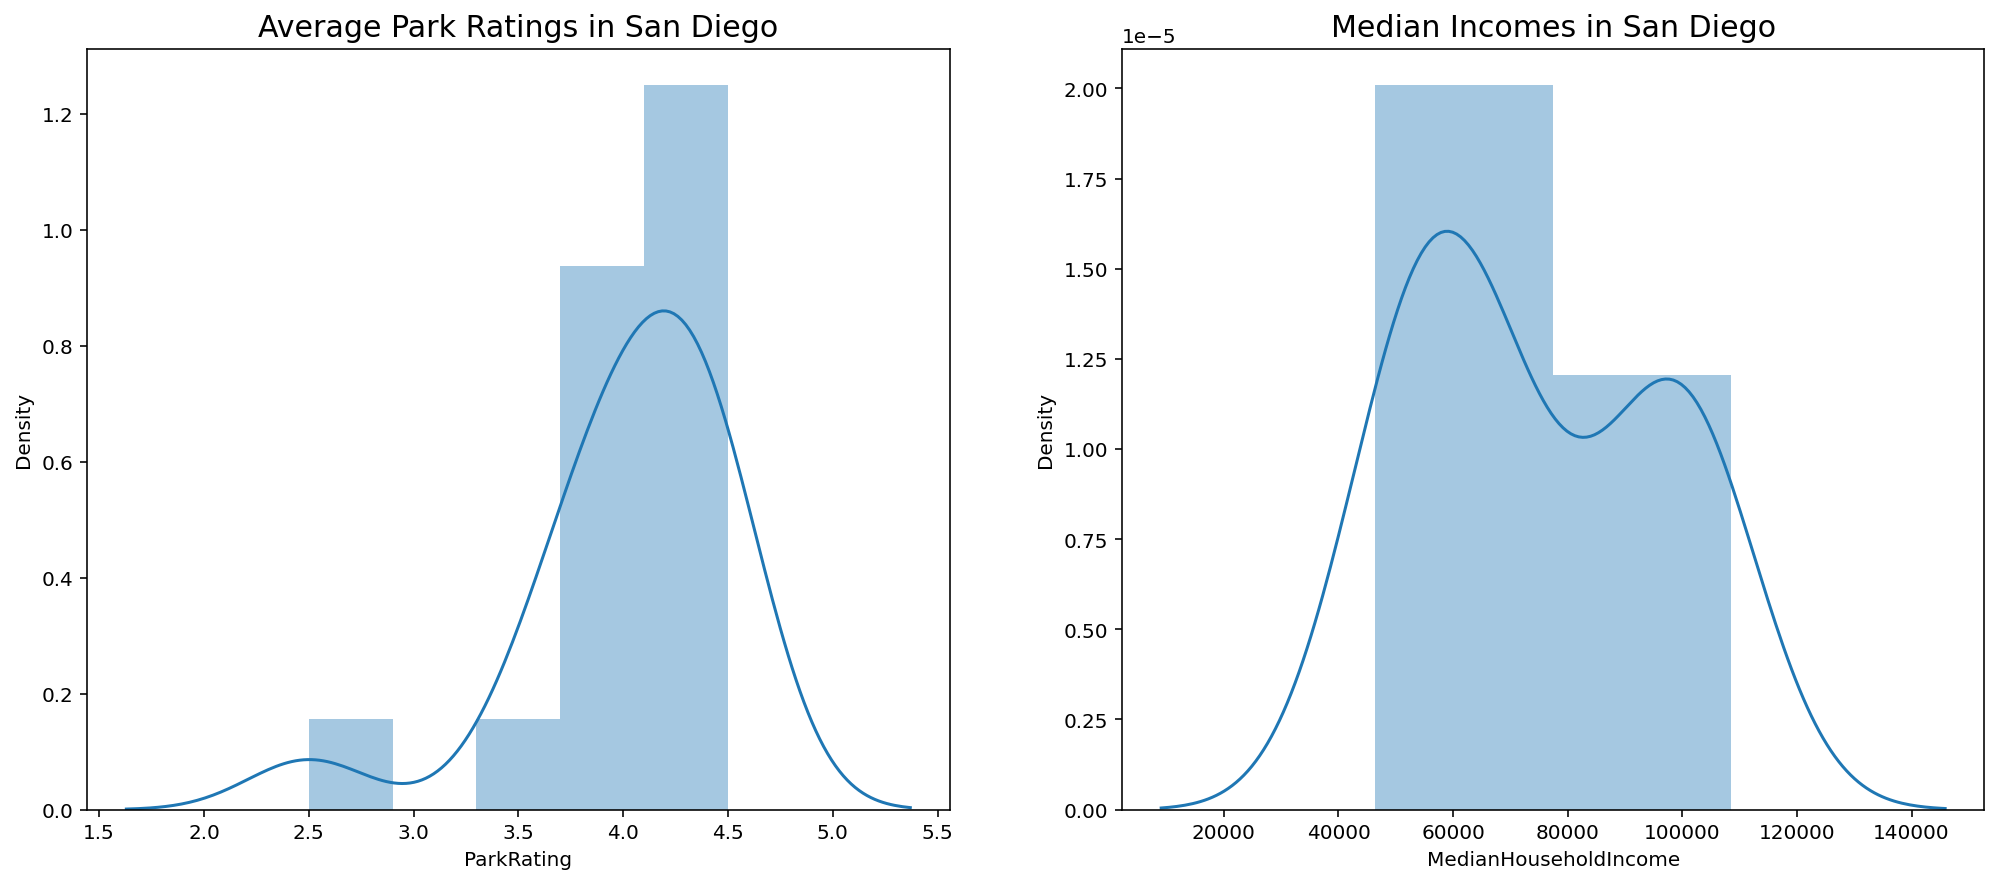

In [17]:
plt.subplot(1, 2, 1)
sns.distplot(df['ParkRating'])
plt.title('Average Park Ratings in San Diego', fontsize = 15)

plt.subplot(1, 2, 2)
sns.distplot(df['MedianHouseholdIncome'])
plt.title('Median Incomes in San Diego', fontsize = 15)

The average park ratings are left skewed, with most ratings ranging from 3.5 to 4.5. There is an outlier for a lower park rating, however. The distribution for median income seems bimodal, with more incomes nearing 60,000 and 100,000.

Below, I will explore how average park rating and median household income could possibly have a relationship together, using a scatterplot

Text(0.5, 1.0, 'Park Rating vs. Median Household Income')

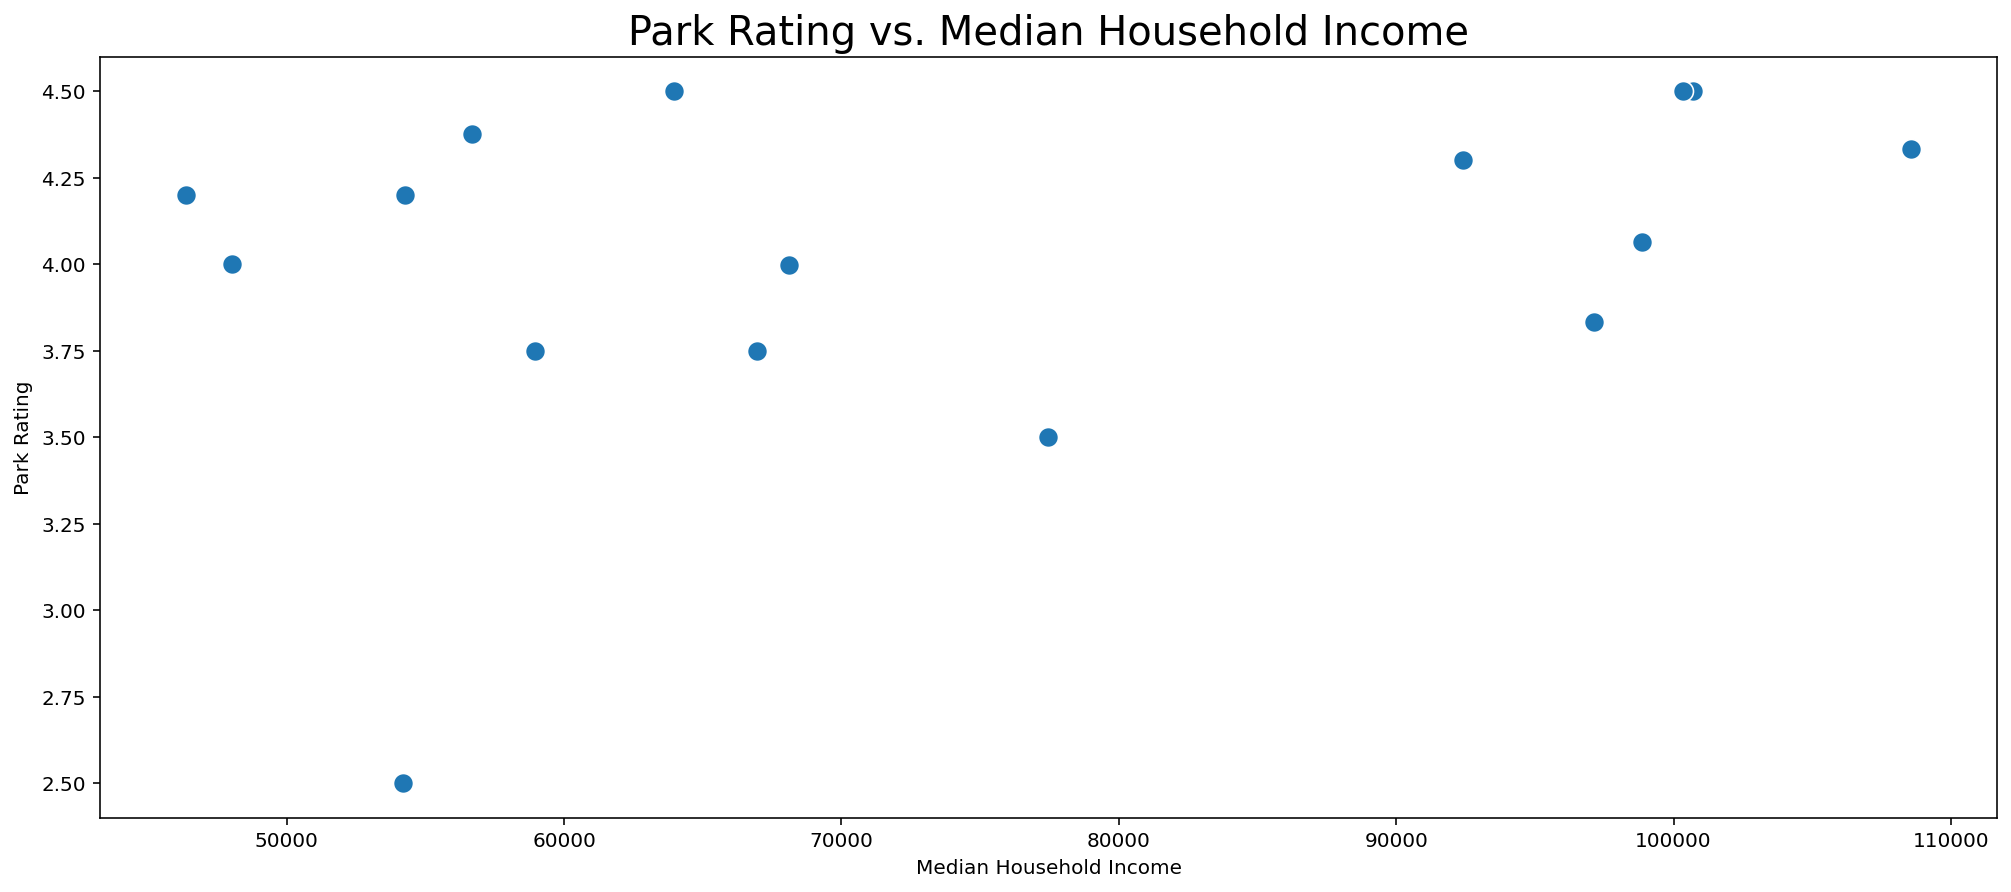

In [18]:
sns.scatterplot(x='MedianHouseholdIncome', y='ParkRating', data=df, s=100)
plt.xlabel('Median Household Income')
plt.ylabel('Park Rating');
plt.title('Park Rating vs. Median Household Income', fontsize = 20)

There doesn't seem to be a relationship between the two variables, but to be sure I will be running a linear regression model on whether Median Household Income (predictor) impacts Park Rating (outcome). 

In [19]:
outcome, predictors = patsy.dmatrices('ParkRating ~ MedianHouseholdIncome', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             ParkRating   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     1.676
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.216
Time:                        01:52:21   Log-Likelihood:                -10.345
No. Observations:                  16   AIC:                             24.69
Df Residuals:                      14   BIC:                             26.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.45

/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Now that I have the model, I will plot the model fit line against the data I used previously.

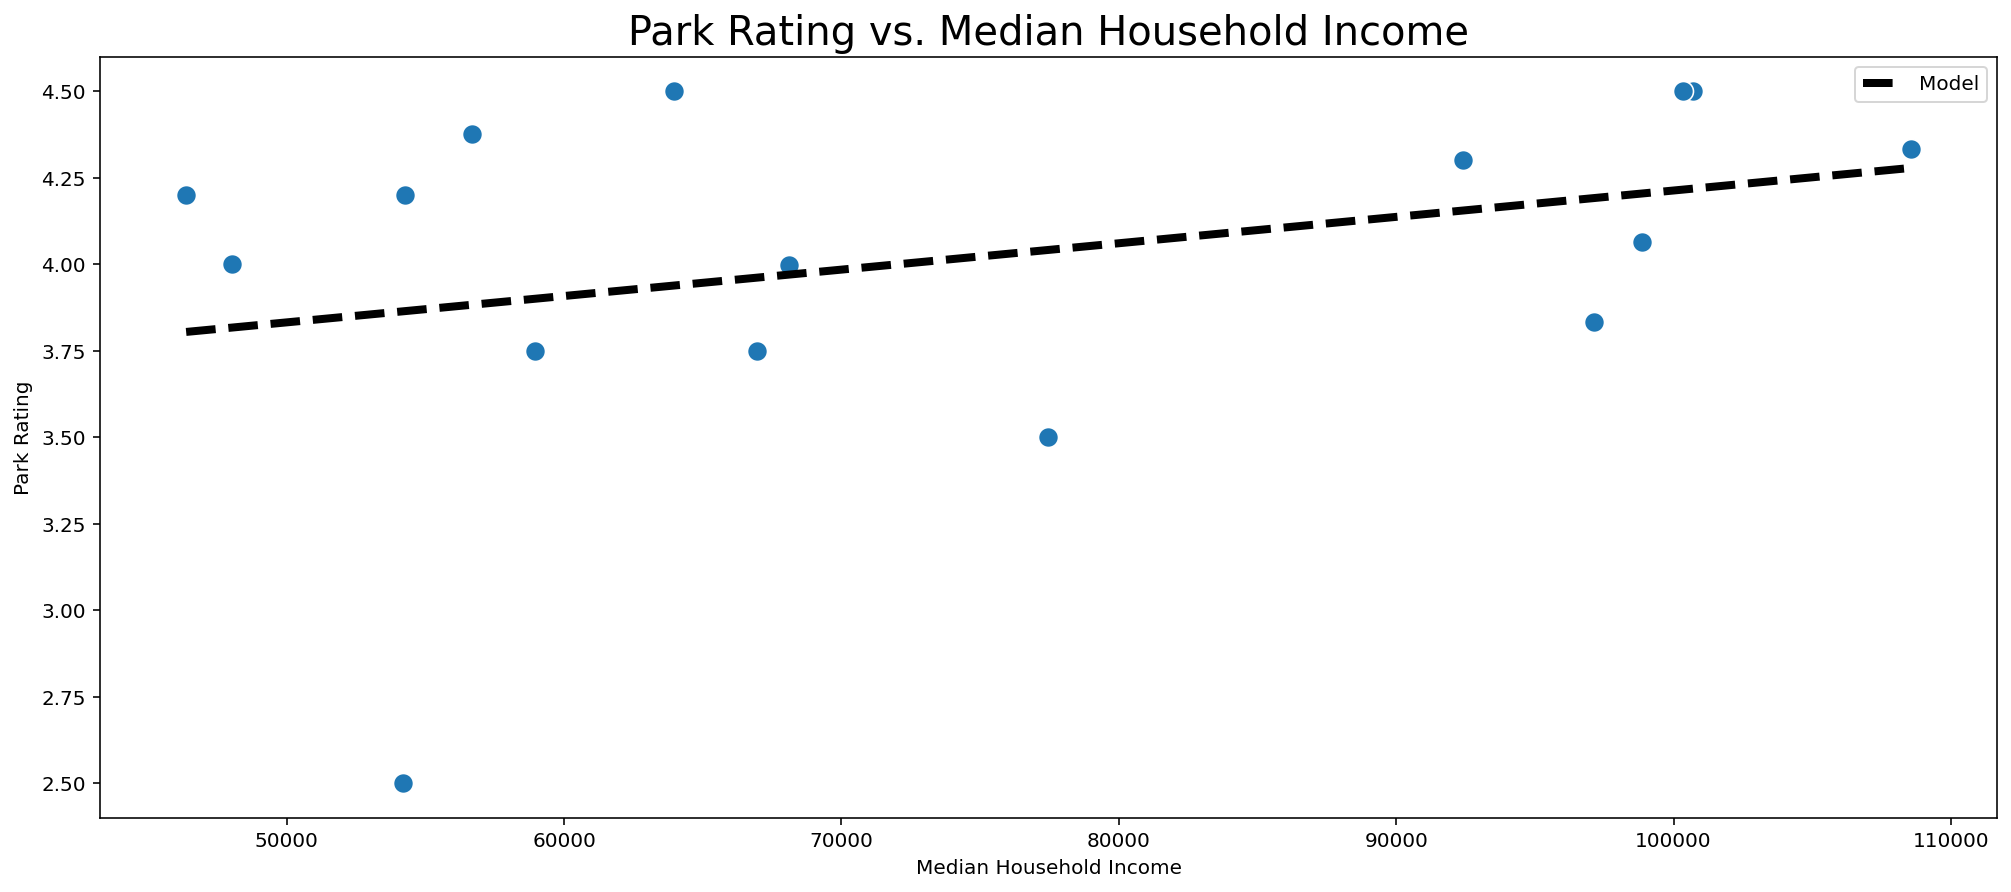

In [20]:
sns.scatterplot(x='MedianHouseholdIncome', y='ParkRating', data=df, s=100)
plt.xlabel('Median Household Income')
plt.ylabel('Park Rating');
plt.title('Park Rating vs. Median Household Income', fontsize = 20)

#generating and plotting model fit line
xs = np.arange(df['MedianHouseholdIncome'].min(), df['MedianHouseholdIncome'].max())
ys = 7.624e-06 * xs + 3.4504
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.legend();

The model fit line suggests that there could be a correlation between the two variables, but its strength is not very convincing. I will also print the pearson correlation for the variables below.

In [21]:
print('corr: ', pearsonr(df['MedianHouseholdIncome'],df['ParkRating'])[0])

corr:  0.32700183267068844


The pearson correlation is 0.32 giving it a medium strength of association.

# Ethics & Privacy

The data for each city in San Diego county regarding income should not contain personal information of an individual. The data for each Yelp review did contain addresses and phone numbers, but because those are tied to public spaces they shouldn't be a concern for privacy. In the end they were removed or changed anyway. 

The data came from the city of San Diego, a public sector, so there should not be any bias for the reports on median household income. However, for the Yelp reviews they could be heavily biased as that is the nature of self-made reviews. The reviews were done by individuals rather than a group or organization that could maintain a neutral position. There is also no way for me to verify that these were real reviews, since there could be fake reviews done by computer simulations and such.

# Conclusion & Discussion

Based on my analysis, I cannot conclude that lower median household income leads to lower park ratings. My analysis did show that given a lower median household income, park rating will be lower in average. But there is potential that the outlier in my data could have caused it. There was not a strong enough correlation found between the two variables using linear regression, so my hypothesis is wrong. Therefore, I accept the null hypothesis that median household income has no effect on park ratings.

I encountered many limitiations during my project. The first one was the number of observations I had to work with. To be able to join the two datasets I chose, I had to reduce the number of observations from the Yelp reviews to the ones consisting of cities in San Diego county. That number became smaller when I found that two cities didn't have Yelp reviews. Because I had so few observations, I didn't want to risk removing the outlier in my park ratings data as that could have affected my analysis further. This affected my linear regression model as well, since the number of observations were so small it my model might not have been accurately computed. Another limitation was time. I originally intended to research how physical health is affected by the number of recreation centers and neighborhood household income. This approach required geospatial analyzation which would have been too lengthy, and I wasn't able to find information on household income at the neighborhood/district level.

Overall, this project helped me understand how data science and the process of data analysis takes time and effort. If given more time and resources it would have been interesting to see how my initial research question would have turned out.